In [13]:
# Librerias a utilizar en el EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt
from datetime import datetime
import seaborn as sns
from IPython.display import display, HTML

In [18]:
# Se utiliza un rango de 50 años para la extraccion de datos económicos
timeframe = 365*50
today = datetime.today()
end = today.strftime("%Y-%m-%d")
start = (today - dt.timedelta(days=timeframe)).strftime("%Y-%m-%d")

# Se utiliza un rango de 25 años para la extraccion de datos bursátiles
stock_timeframe = 365*23
stock_start = (today - dt.timedelta(days=stock_timeframe)).strftime("%Y-%m-%d")
stock_end = end

In [19]:
# Extraer datos de la carpeta 'raw'
df_gdp = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\gdp.csv',index_col=0, header=0)
df_inflation = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\inflation.csv',index_col=0, header=0)
df_interest_rate_spread = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\interest_rate_spread.csv',index_col=0, header=0)
df_interest_rates = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\interest_rates.csv',index_col=0, header=0)
df_unemployment = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\unemployment.csv',index_col=0, header=0)
df_usd = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\usd.csv',index_col=0, header=0)
df_market_hist = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_hist.csv',index_col=0, header=0)
df_market_rets = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_rets.csv',index_col=0, header=0)
df_market_cum = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\market_cum.csv',index_col=0, header=0)


### Análisis Multivariante

In [20]:
indicators = {"gdp":df_gdp, "inflation":df_inflation, "interest_rate_spread":df_interest_rate_spread, 
              "interest_rates":df_interest_rates, "unemployment":df_unemployment, "usd":df_usd, 
              }
stocks = {"market_hist":df_market_hist, "market_rets":df_market_rets, "market_cum":df_market_cum}
medidas = ["mean", "median", "mode", "q0", "q1", "q2", "q3", "var", "std", "skew", "kurt"]

Para realizar el análisis multivariante, analizaremos cada grupo de indicadores por separado comparandolo con los dos índices bursátiles más importantes: el S&P500 (SPY) y el Dow Jones (DIA)

In [21]:
df_market_rets.head()

,Dow_Jones,Gold,Real_Estate,SP500,Materials,Energy,Financials,Industrials,Technology,Staples,Utilities,Healthcare,Discretionary,NASDAQ
Date,,,,,,,,,,,,,,
1998-04-27,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1998-04-28,-0.002976,0.0,0.0,-0.001437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006296
1998-04-29,0.004917,0.0,0.0,0.006908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010847
1998-04-30,0.016250,0.0,0.0,0.018582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009057
1998-05-01,0.008597,0.0,0.0,0.011226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002692


In [22]:
df_market_hist.head()
df_market_hist.index = pd.to_datetime(df_market_hist.index, utc=True)
df_market_hist.index = df_market_hist.index.strftime('%Y-%m-%d')

In [23]:
df_market_hist.head()

,Dow_Jones,Gold,Real_Estate,SP500,Materials,Energy,Financials,Industrials,Technology,Staples,Utilities,Healthcare,Discretionary,NASDAQ
Date,,,,,,,,,,,,,,
1998-04-27,52.216087,NaN,NaN,69.519714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1820.310059
1998-04-28,52.060669,NaN,NaN,69.419792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1831.770020
1998-04-29,52.316628,NaN,NaN,69.899376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1851.640015
1998-04-30,53.166786,NaN,NaN,71.198280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1868.410034
1998-05-01,53.623844,NaN,NaN,71.997581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.439941


In [24]:
for indicator, df_indicator in indicators.items():
    print(indicator)
    df_ind_pct_chg = df_indicator.pct_change().fillna(0)
    # Guardar el DataFrame como un archivo csv
    df_ind_pct_chg.to_csv(r"C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\{0}.csv".format(indicator))
    # Merge los datos de indicadores y los datos de mercado
    df_ind_mkt = pd.merge(df_market_rets[["SPY","DIA"]], df_ind_pct_chg, left_index=True, right_index=True)
    # for mkt in ["SPY","DIA"]:
    #     df_ind_mkt[mkt] = df_ind_mkt[mkt].pct_change().fillna(0)
    min = df_ind_mkt.corr().min().min()
    max = df_ind_mkt.corr().max().max()
    center = (max+min)/2
    fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,15))
    fig.suptitle(indicator)
    sns.heatmap(df_ind_mkt.corr(),vmin=min, vmax=max, center=center,
                cmap=sns.color_palette("RdYlGn", as_cmap=True),
                square=True, linewidths=.5, annot=True, fmt='.3f', ax=axs[0]);
    df_ind_mkt.boxplot(figsize=(20,10),ax=axs[1]);
    sns.pairplot(df_ind_mkt, diag_kind="kde", kind="reg")
    print(df_ind_mkt.corr())

gdp


KeyError: "None of [Index(['SPY', 'DIA'], dtype='object')] are in the [columns]"

In [25]:
df_ind_chg = df_interest_rates.pct_change().fillna(0)

In [26]:
df_irate_mkt = pd.merge(df_market_rets[["SPY","DIA"]], df_ind_chg.loc[:,'2-Year Treasury Yield':'30-Year Treasury Yield'], left_index=True, right_index=True)

KeyError: "None of [Index(['SPY', 'DIA'], dtype='object')] are in the [columns]"

<AxesSubplot:>

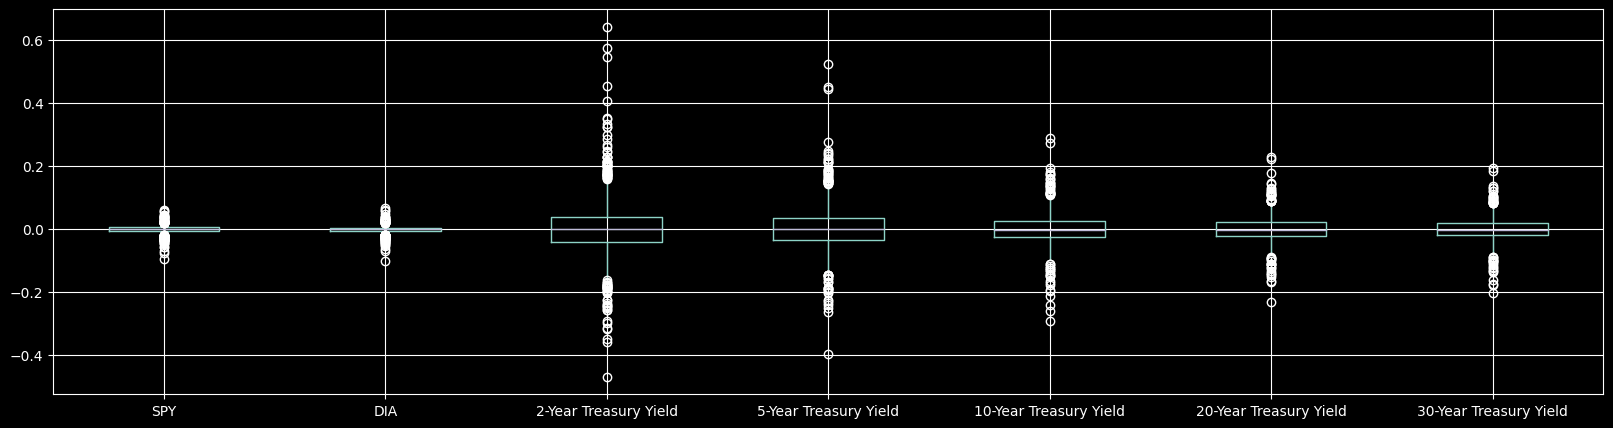

In [8]:
df_irate_mkt.boxplot(figsize=(20,5))

<AxesSubplot:ylabel='Density'>

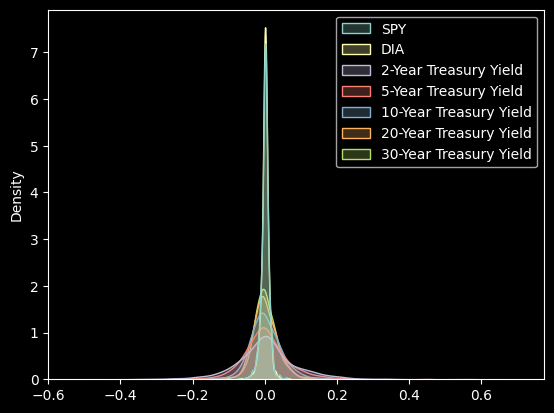

In [9]:
# df_irate_spy.hist(subplots=False, figsize=(10,10))
sns.kdeplot(df_irate_mkt, alpha=0.25, fill=True)

In [49]:
sns.pairplot(df_irate_mkt, diag_kind="kde", kind="reg", hue="DIA")

KeyboardInterrupt: 

### Análisis Bivariante

#### Scatter plot

In [27]:
df_interest_rates.columns

Index(['3-Month Treasury Yield', '2-Year Treasury Yield',
       '20-Year Treasury Yield'],
      dtype='object')

##### Primera hipótesis:
Indicadores de interés:
- 3-Month Treasury Yield
- 2-Year Treasury Yield
- 10-Year Treasury Yield

Indices de mercado de interés:
- S&P500 (SPY)
- Dow Jones (DIA)

In [28]:
df_interest_rates.columns

Index(['3-Month Treasury Yield', '2-Year Treasury Yield',
       '20-Year Treasury Yield'],
      dtype='object')

In [29]:
df_gdp.columns.to_list()

['GDP', 'Real GDP']

In [30]:
df_market_rets.columns

Index(['Dow_Jones', 'Gold', 'Real_Estate', 'SP500', 'Materials', 'Energy',
       'Financials', 'Industrials', 'Technology', 'Staples', 'Utilities',
       'Healthcare', 'Discretionary', 'NASDAQ'],
      dtype='object')

In [31]:
markets = ["SPY","DIA", "^IXIC"]

In [32]:
markets = ["SPY"]
indicators_names = df_interest_rate_spread.columns.to_list()

In [33]:
ind_dict = {"gdp":df_gdp, "inflation":df_inflation, "interest_rate_yld":df_interest_rate_spread, 
              "interest_rates":df_interest_rates, "unemployment":df_unemployment, "usd":df_usd, 
              "market_hist":df_market_hist, "market_rets":df_market_rets, "market_cum":df_market_cum}

In [34]:
ind_dict = {"interest_rate_spread":df_interest_rate_spread}

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


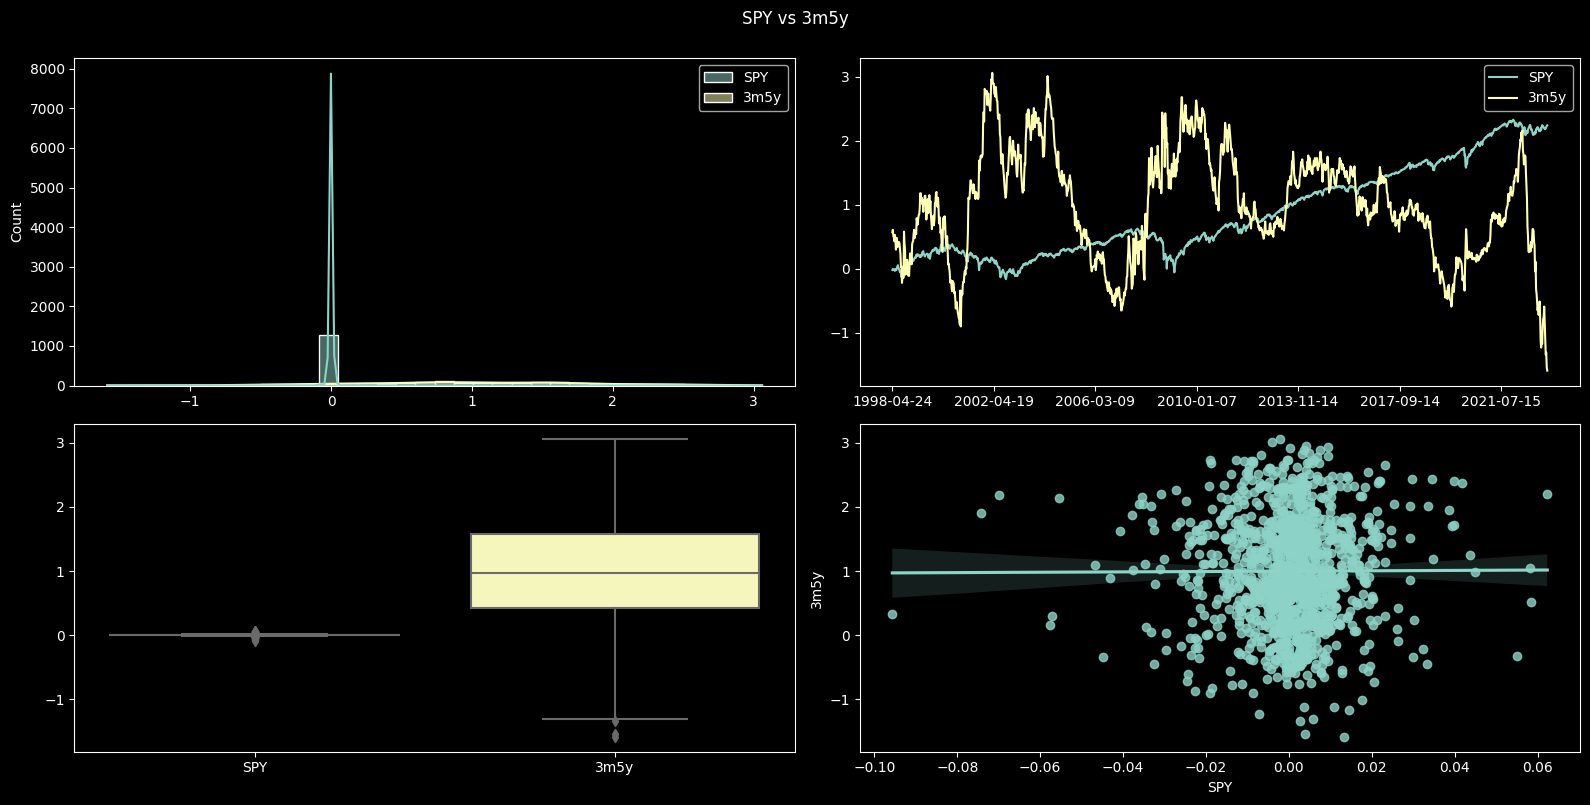

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


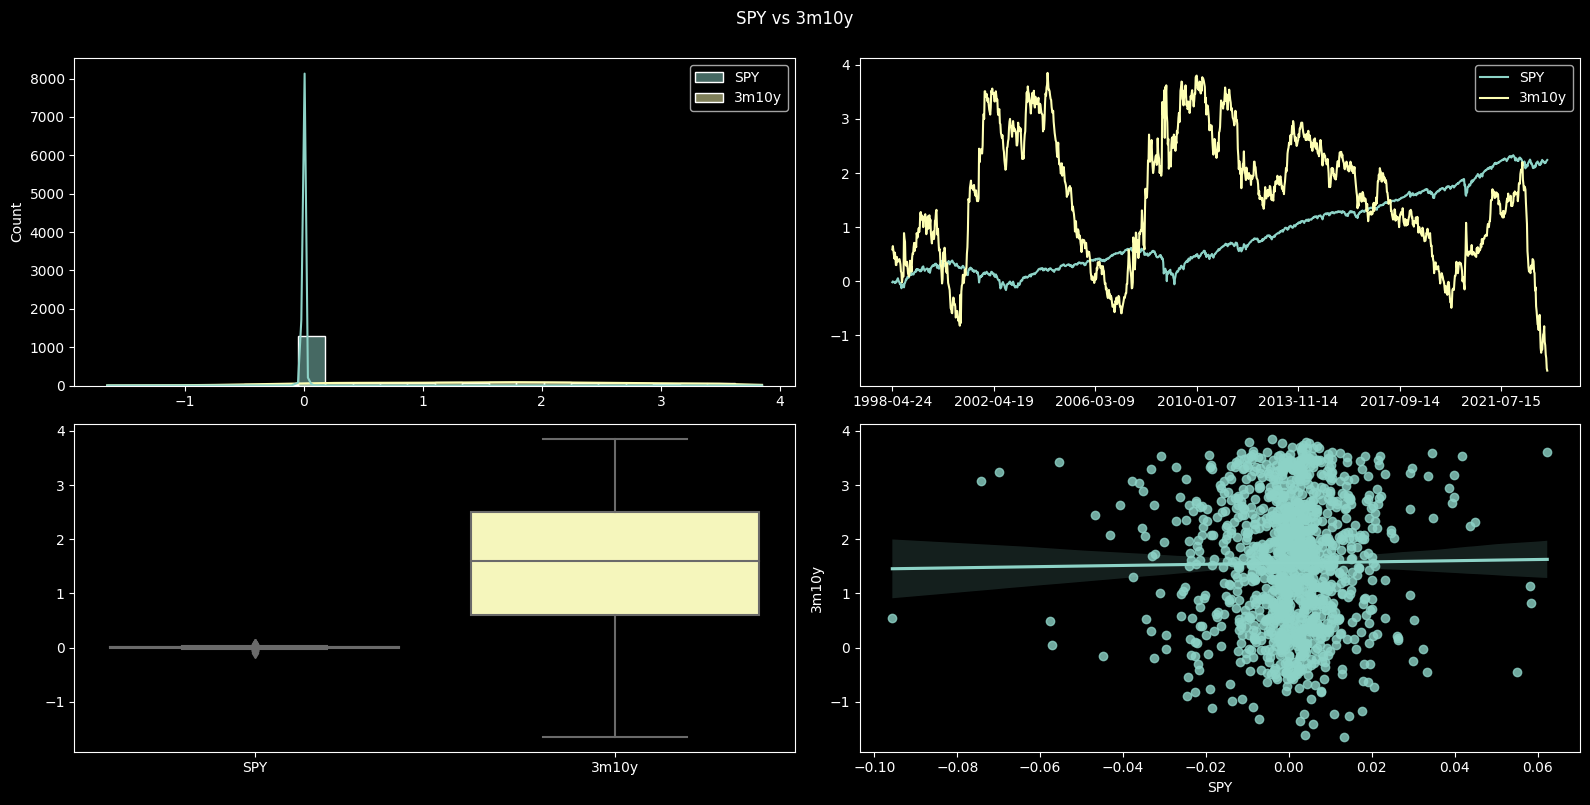

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


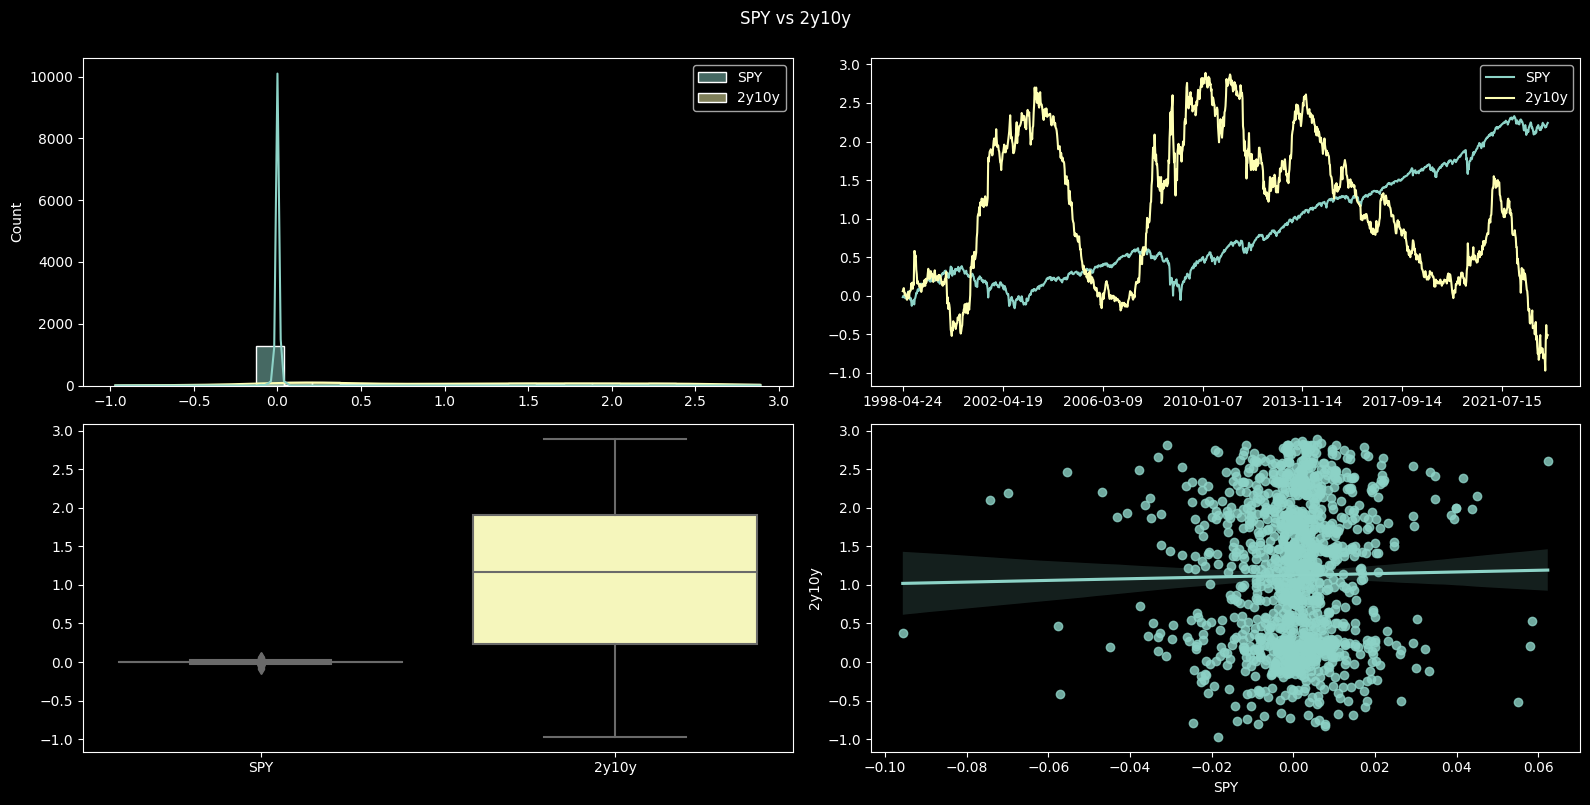

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


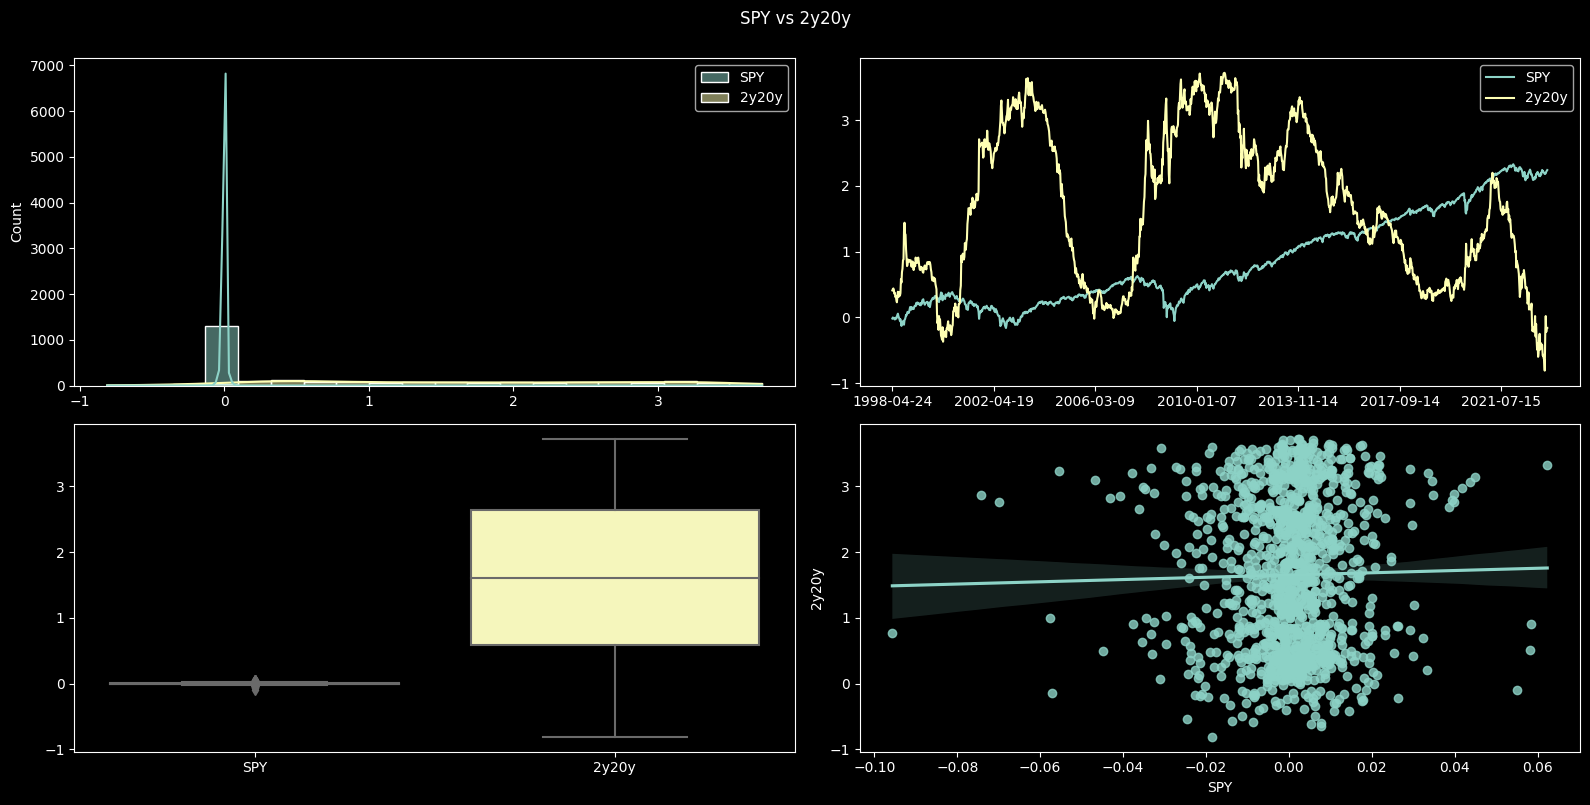

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


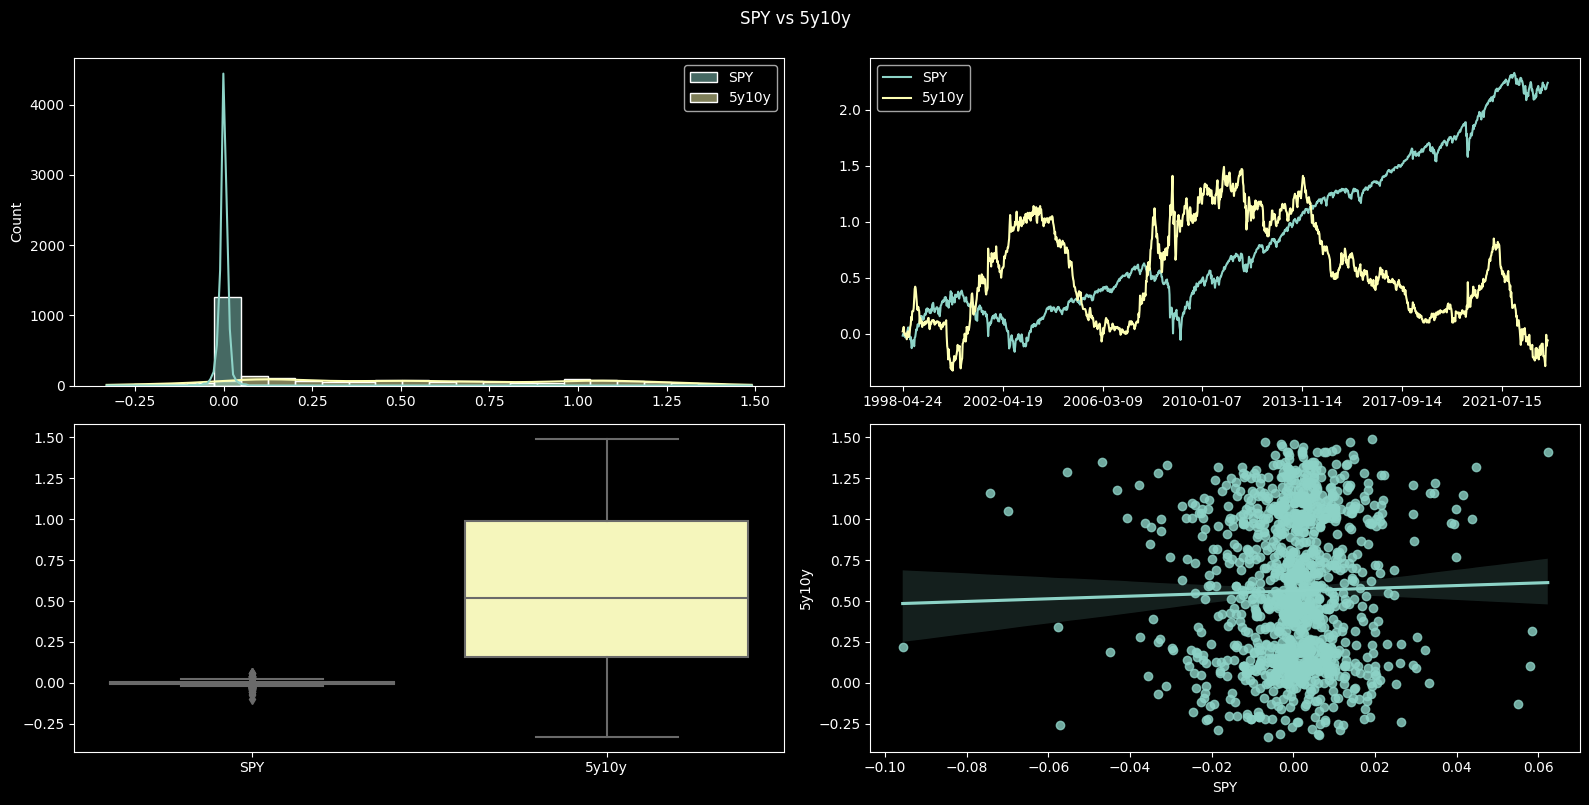

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


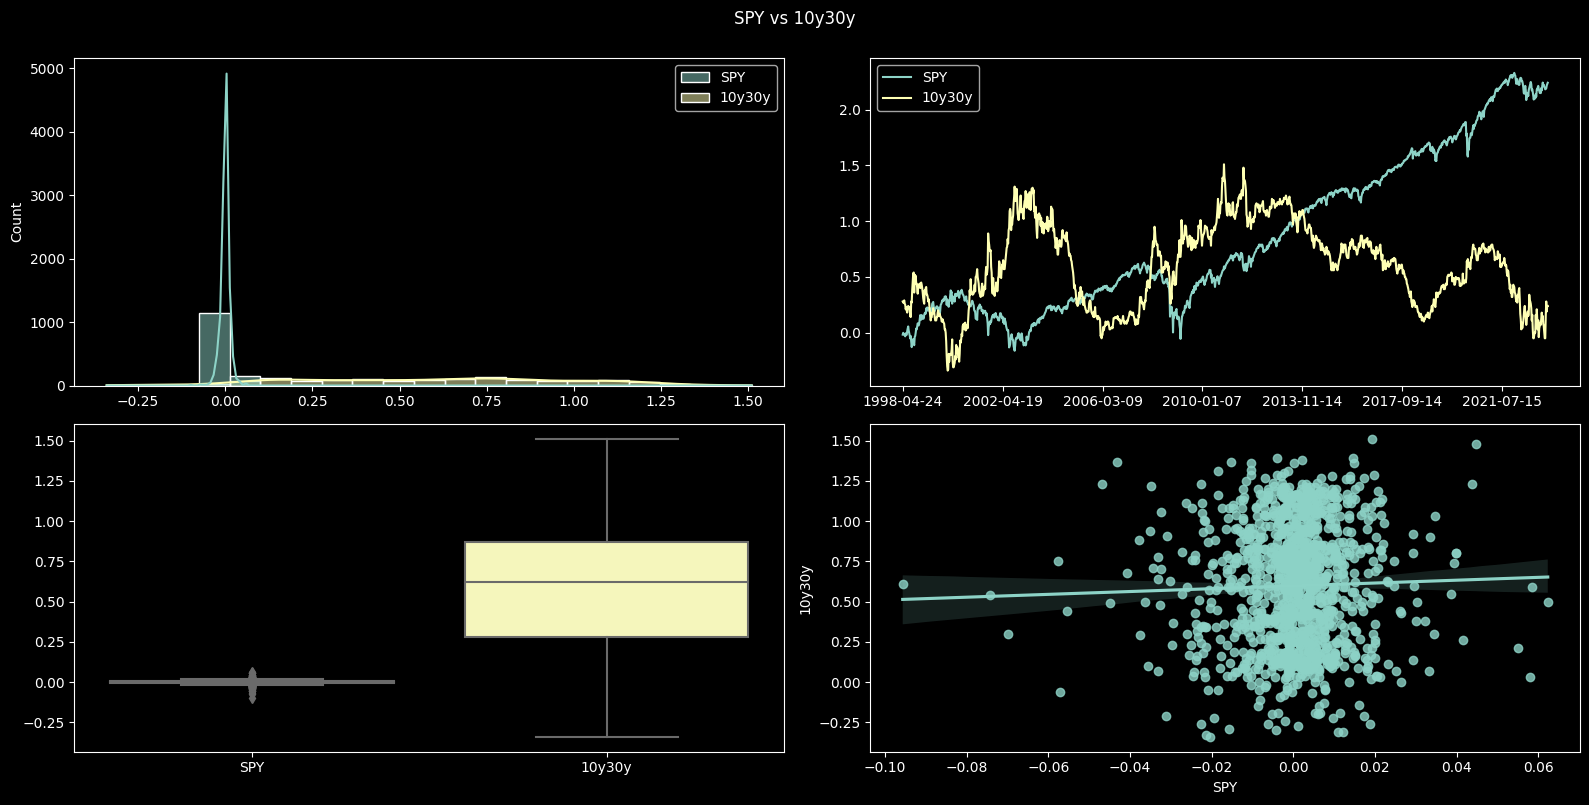

,SPY
SPY,1.0000
3m5y,0.0043
3m10y,0.0117
2y10y,0.0147
2y20y,0.0188
5y10y,0.0227
10y30y,0.0296
10yTrea30yFRM,-0.0510


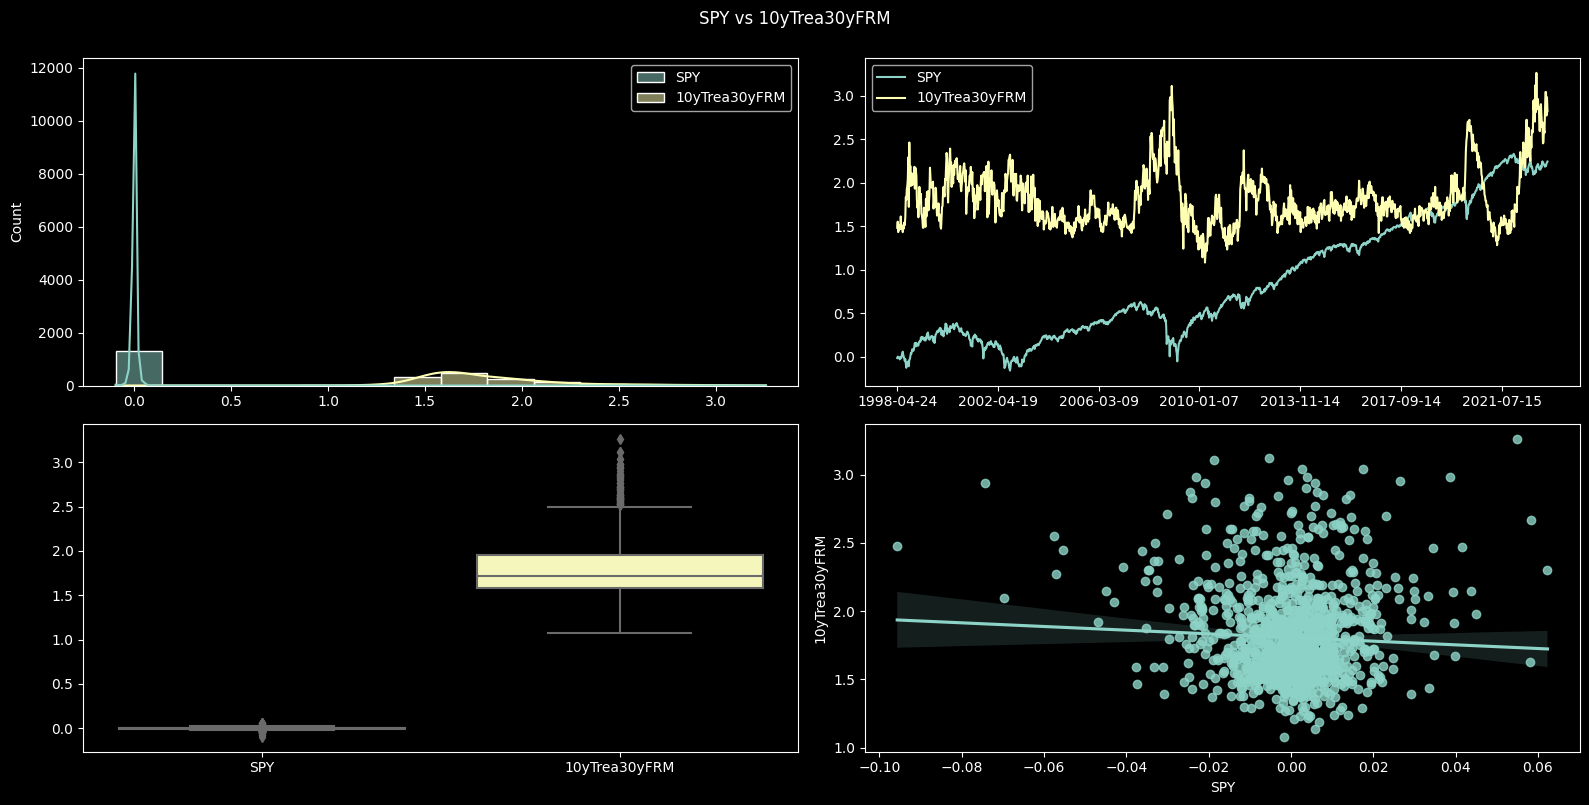

<Figure size 1000x1000 with 0 Axes>

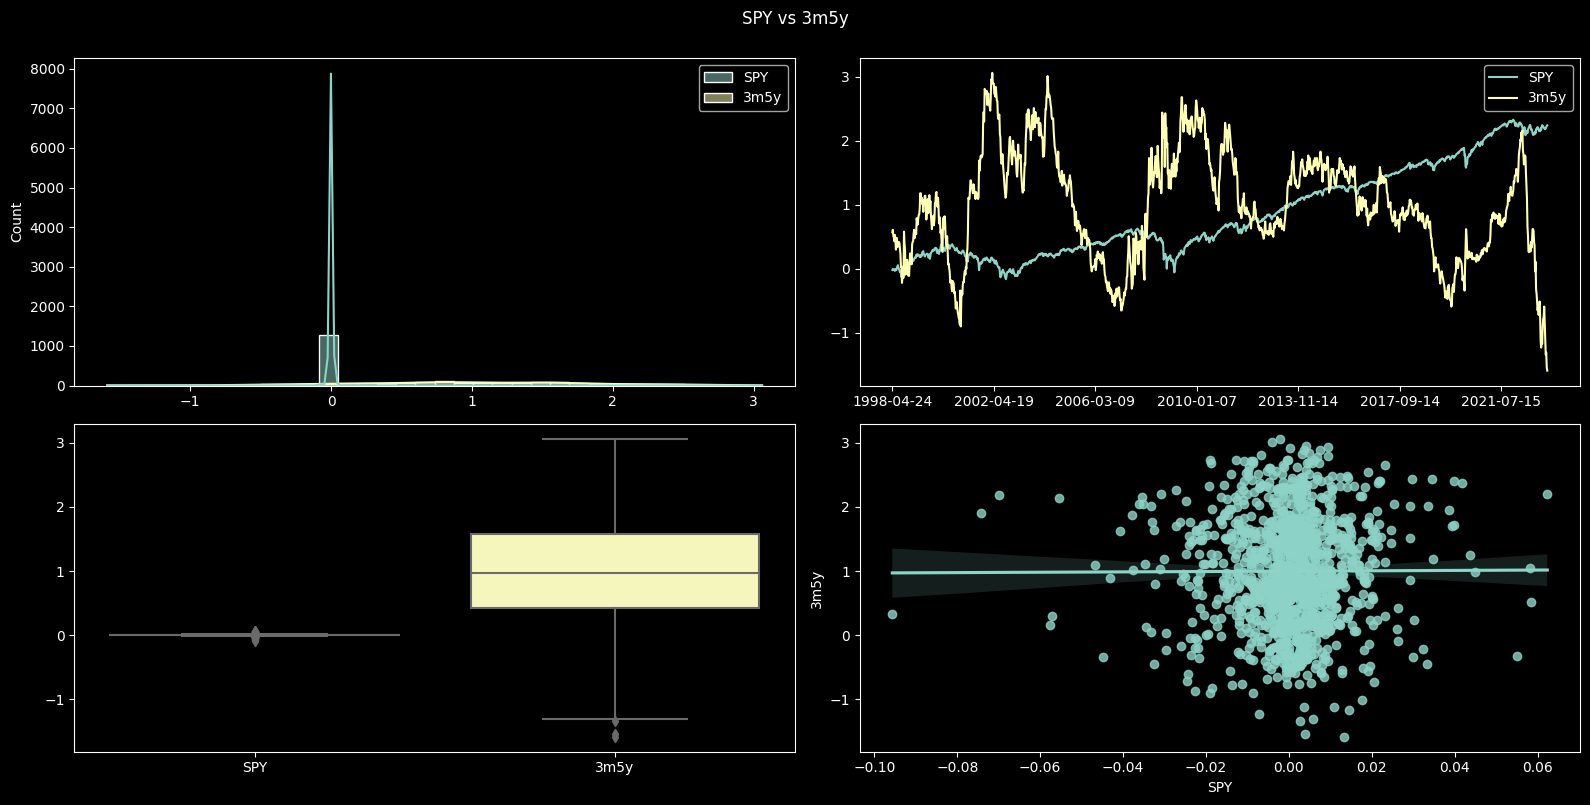

<Figure size 1000x1000 with 0 Axes>

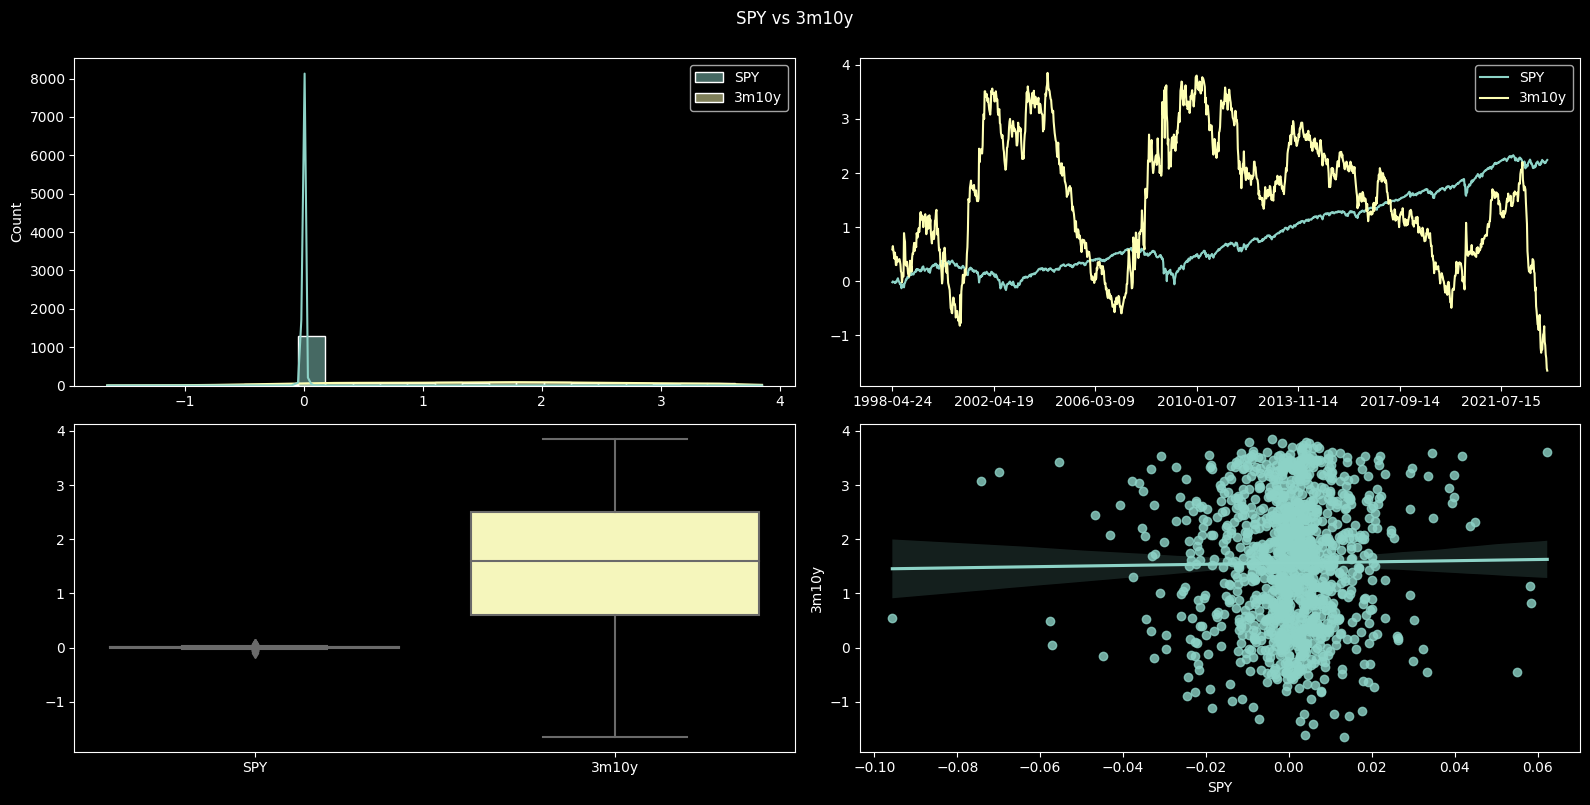

<Figure size 1000x1000 with 0 Axes>

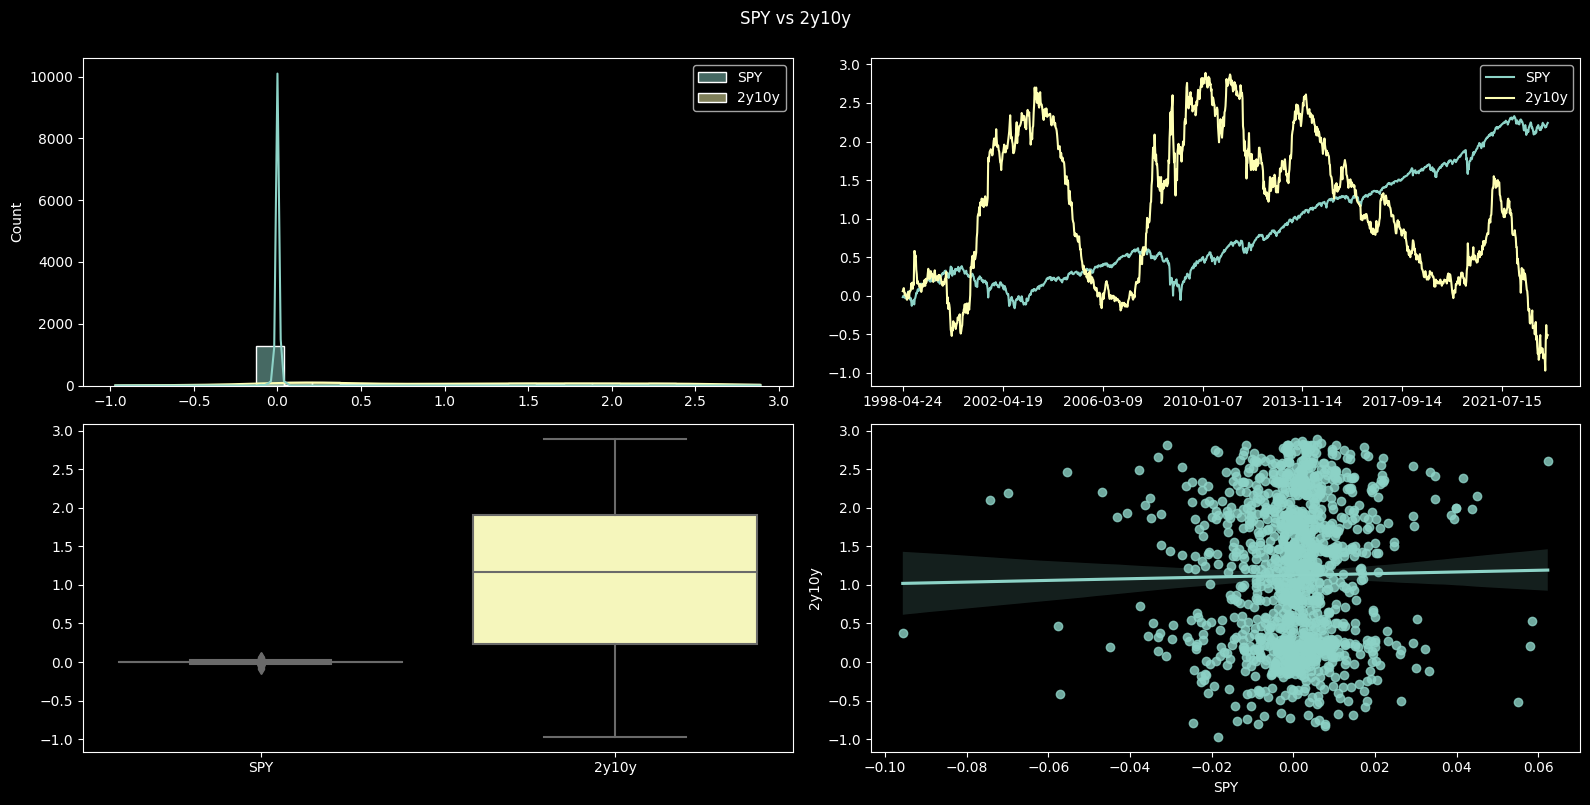

<Figure size 1000x1000 with 0 Axes>

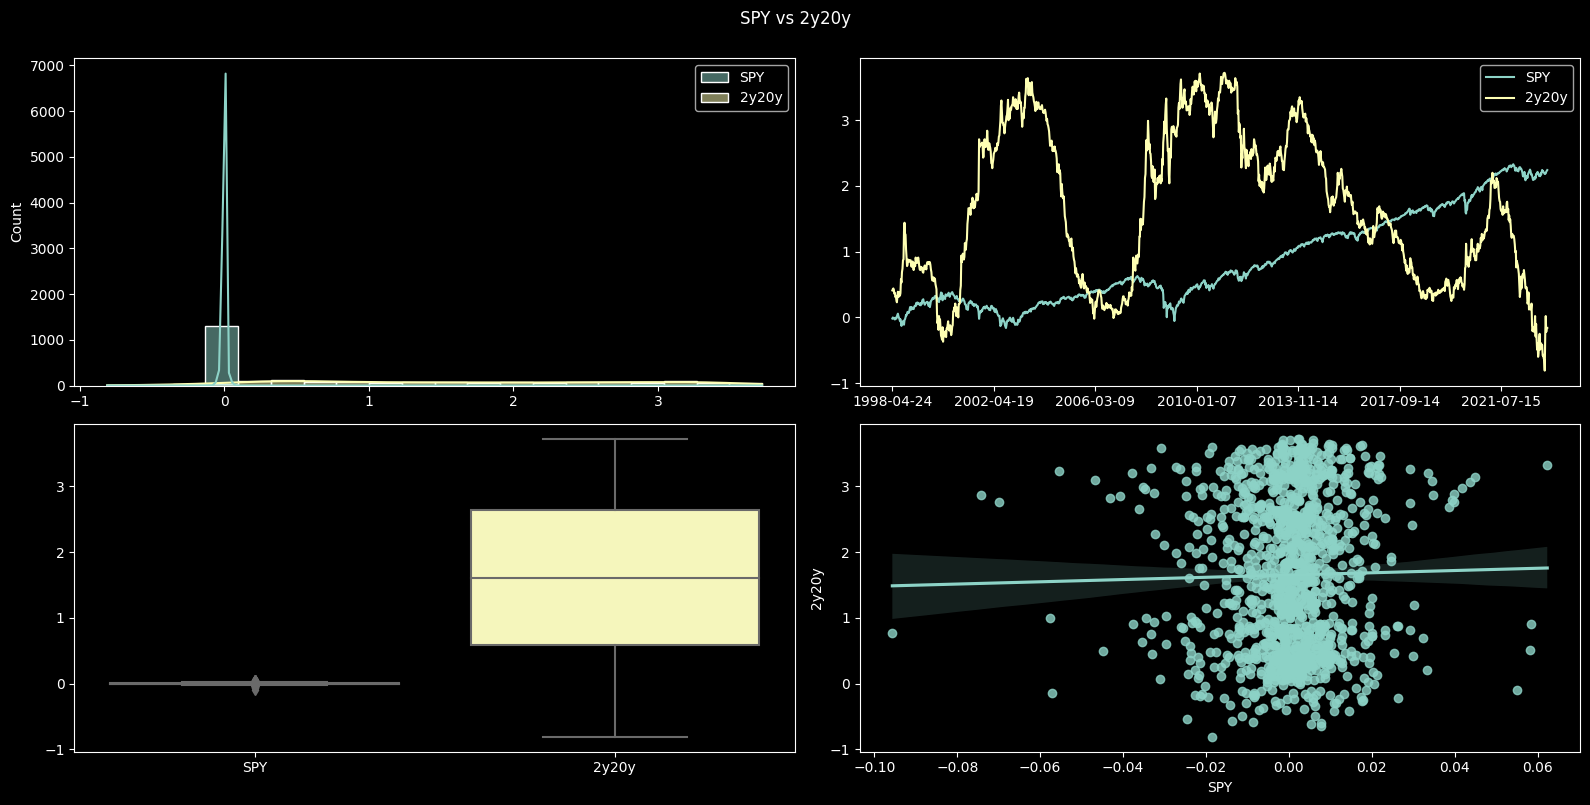

<Figure size 1000x1000 with 0 Axes>

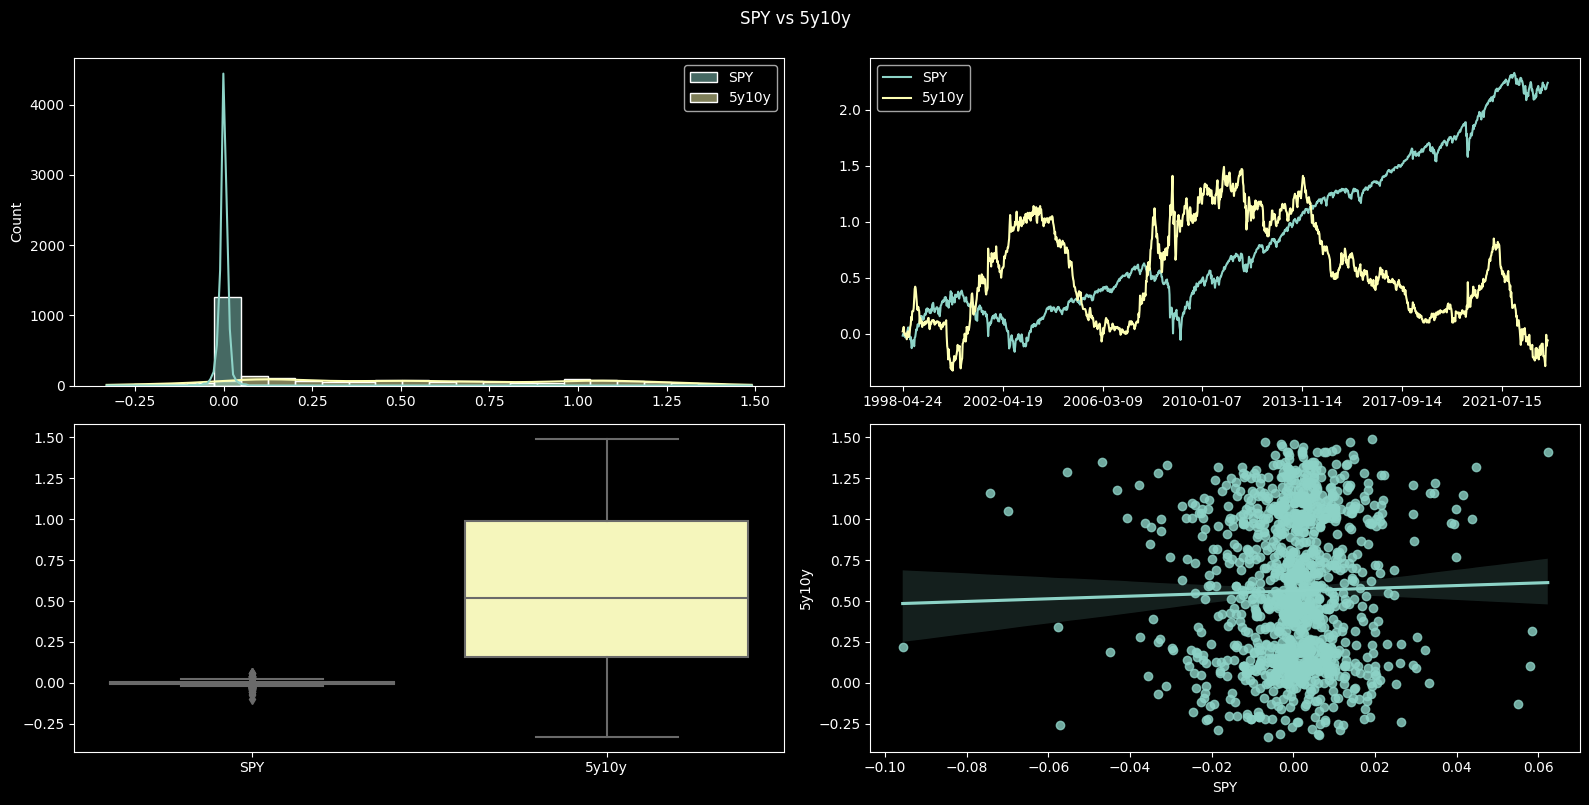

<Figure size 1000x1000 with 0 Axes>

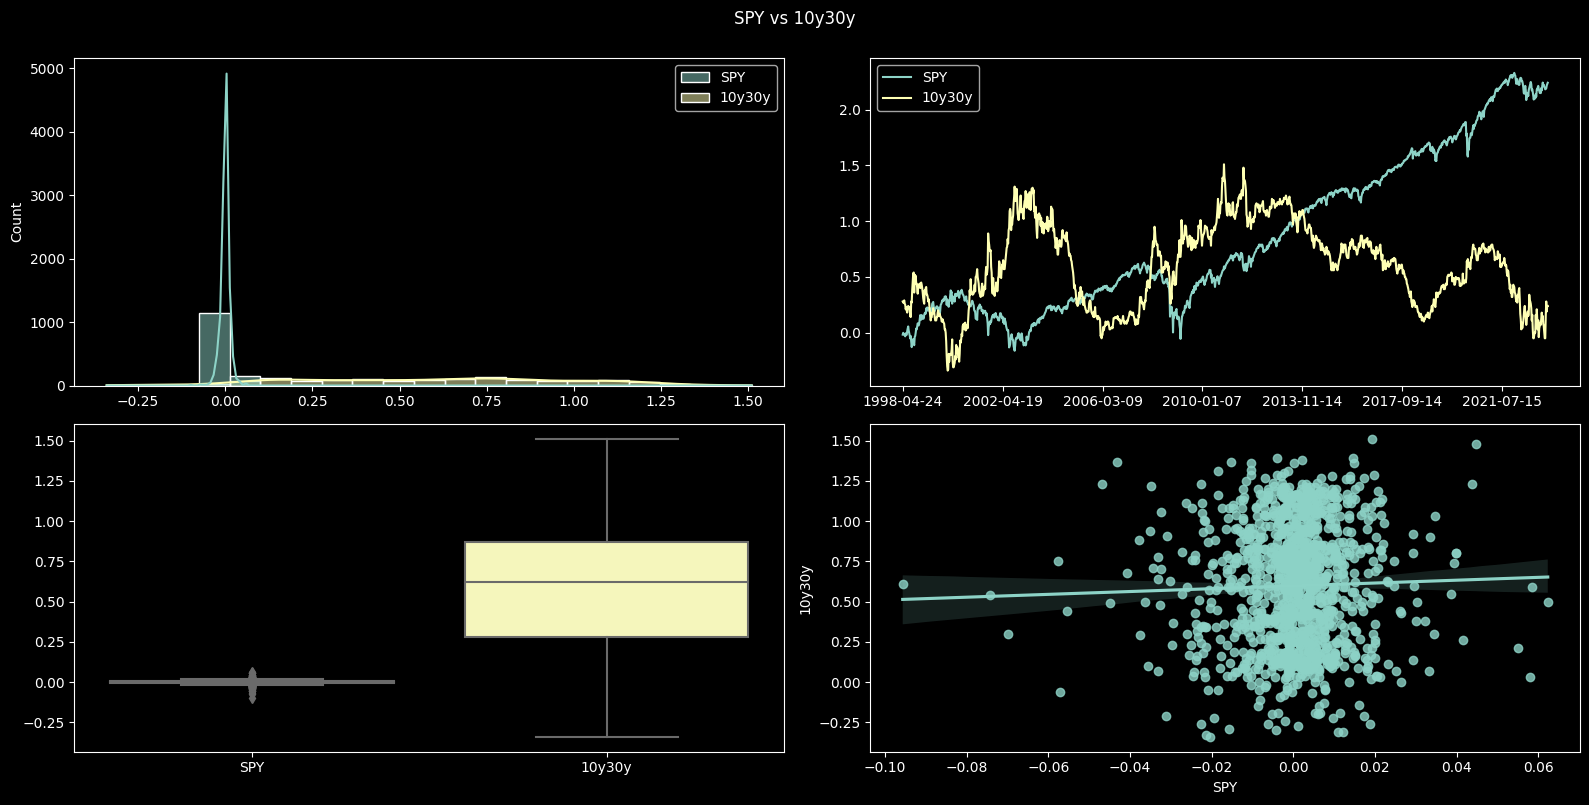

<Figure size 1000x1000 with 0 Axes>

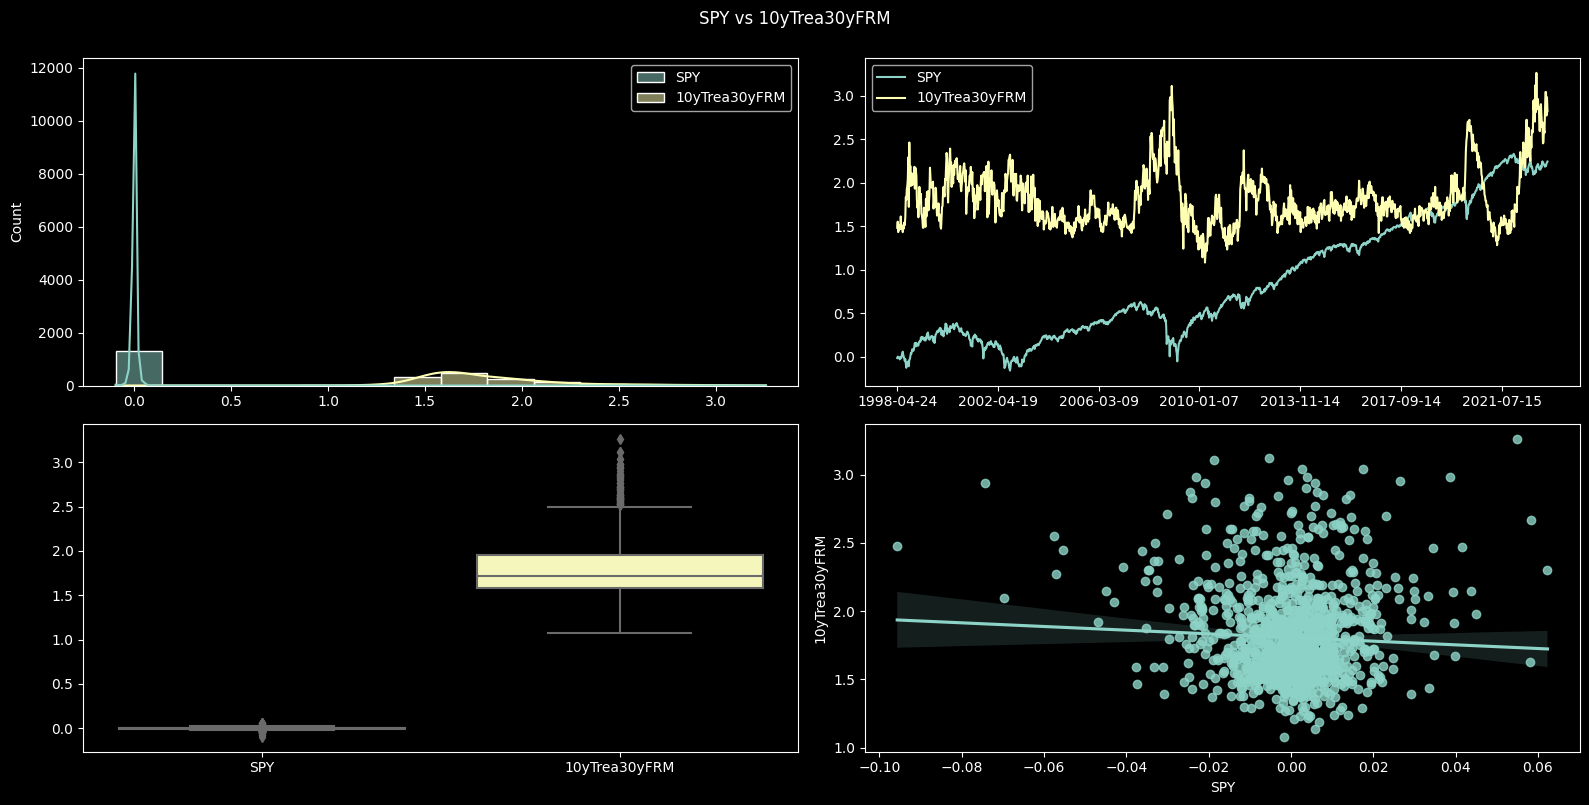

In [36]:
for ind, df_ind in ind_dict.items():
    df_ind_chg = df_ind.pct_change().fillna(0)
    df_ind_chg = df_ind
    
    df_ind_mkt = pd.merge(df_market_rets[markets], df_ind_chg[indicators_names], left_index=True, right_index=True)
    df_ind_mkt_values = pd.merge(df_market_cum[markets], df_ind[indicators_names].loc[stock_start:stock_end], left_index=True, right_index=True)

    for market in markets:
        for indicator in indicators_names:
            fig = plt.figure(figsize=(10,10))
            fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), )
            plt.subplots_adjust(hspace=0.5, top=1, wspace=0.5)
            fig.suptitle(market+" vs "+indicator, fontsize=12, y=1)
            # Histogram (kde) plot
            sns.histplot(data=[df_ind_mkt[market],df_ind_mkt[indicator]], color="#4CB391", fill=True, alpha=0.5, kde=True, ax=axs[0,0])
            sns.boxplot(data=df_ind_mkt[[market,indicator]],ax=axs[1,0])
            sns.regplot(x=df_ind_mkt[market], y=df_ind_mkt[indicator],ax=axs[1,1])
            df_ind_mkt_values[[market,indicator]].plot(ax=axs[0,1])
            plt.tight_layout()
            plt.close(fig)
            # Create an HTML table
            table = HTML(df_ind_mkt.corr()[[market]].round(4).to_html(index=True))
            # Display the chart and table side by side
            display(table, fig)
        

In [36]:
df_market_cum

,Dow_Jones,Gold,Real_Estate,SP500,Materials,Energy,Financials,Industrials,Technology,Staples,Utilities,Healthcare,Discretionary,NASDAQ
Date,,,,,,,,,,,,,,
1998-04-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-04-28,-0.002976,0.000000,0.000000,-0.001437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006296
1998-04-29,0.001940,0.000000,0.000000,0.005471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017143
1998-04-30,0.018190,0.000000,0.000000,0.024054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026200
1998-05-01,0.026787,0.000000,0.000000,0.035280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12,2.321108,1.546263,2.635634,2.264414,2.612477,2.977044,2.070001,2.456175,2.629198,1.895221,2.161745,2.432963,2.649585,2.699005
2023-04-13,2.332279,1.573468,2.632799,2.277697,2.622763,2.983285,2.078988,2.459891,2.647801,1.900803,2.161889,2.445955,2.671670,2.718866
2023-04-14,2.327784,1.551723,2.616689,2.275254,2.615526,2.985122,2.088816,2.458690,2.642248,1.894459,2.150693,2.437921,2.672965,2.715348


In [37]:
pd.merge(ind_dict["interest_rate_spread"].shift(0),df_market_cum["SP500"], left_index=True, right_index=True).corr()

,3m10y,2y20y,5y10y,SP500
3m10y,1.000000,0.925375,0.841584,-0.306412
2y20y,0.925375,1.000000,0.964716,-0.331399
5y10y,0.841584,0.964716,1.000000,-0.251873
SP500,-0.306412,-0.331399,-0.251873,1.000000


In [ ]:
def analisis_bivariante(markets, indicators_names, stock_start, stock_end, df_market_rets, df_market_cum, df_ind):
    df_ind_chg = df_ind.pct_change().fillna(0)
    df_ind_mkt = pd.merge(df_market_rets[markets], df_ind_chg[indicators_names], left_index=True, right_index=True)
    df_ind_mkt_values = pd.merge(df_market_cum[markets], df_ind[indicators_names].loc[stock_start:stock_end], left_index=True, right_index=True)
    for market in markets:
        for indicator in indicators_names:
            fig = plt.figure(figsize=(10,10))
            fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), )
            plt.subplots_adjust(hspace=0.5, top=1, wspace=0.5)
            fig.suptitle(market+" vs "+indicator, fontsize=12, y=1)
            # Histogram (kde) plot
            sns.histplot(data=[df_ind_mkt[market],df_ind_mkt[indicator]], color="#4CB391", fill=True, alpha=0.5, kde=True, ax=axs[0,0])
            sns.boxplot(data=df_ind_mkt[[market,indicator]],ax=axs[1,0])
            sns.regplot(x=df_ind_mkt[market], y=df_ind_mkt[indicator],ax=axs[1,1])
            df_ind_mkt_values[[market,indicator]].plot(ax=axs[0,1])
            plt.tight_layout()
            plt.close(fig)
            # Create an HTML table
            table = HTML(df_ind_mkt.corr()[[market]].round(4).to_html(index=True))
            # Display the chart and table side by side
            display(table, fig)

    return df_ind_mkt, df_ind_mkt_values


,SPY
SPY,1.0000
DIA,0.9716
^IXIC,0.9339
GDP,0.3425
Real GDP,0.3416


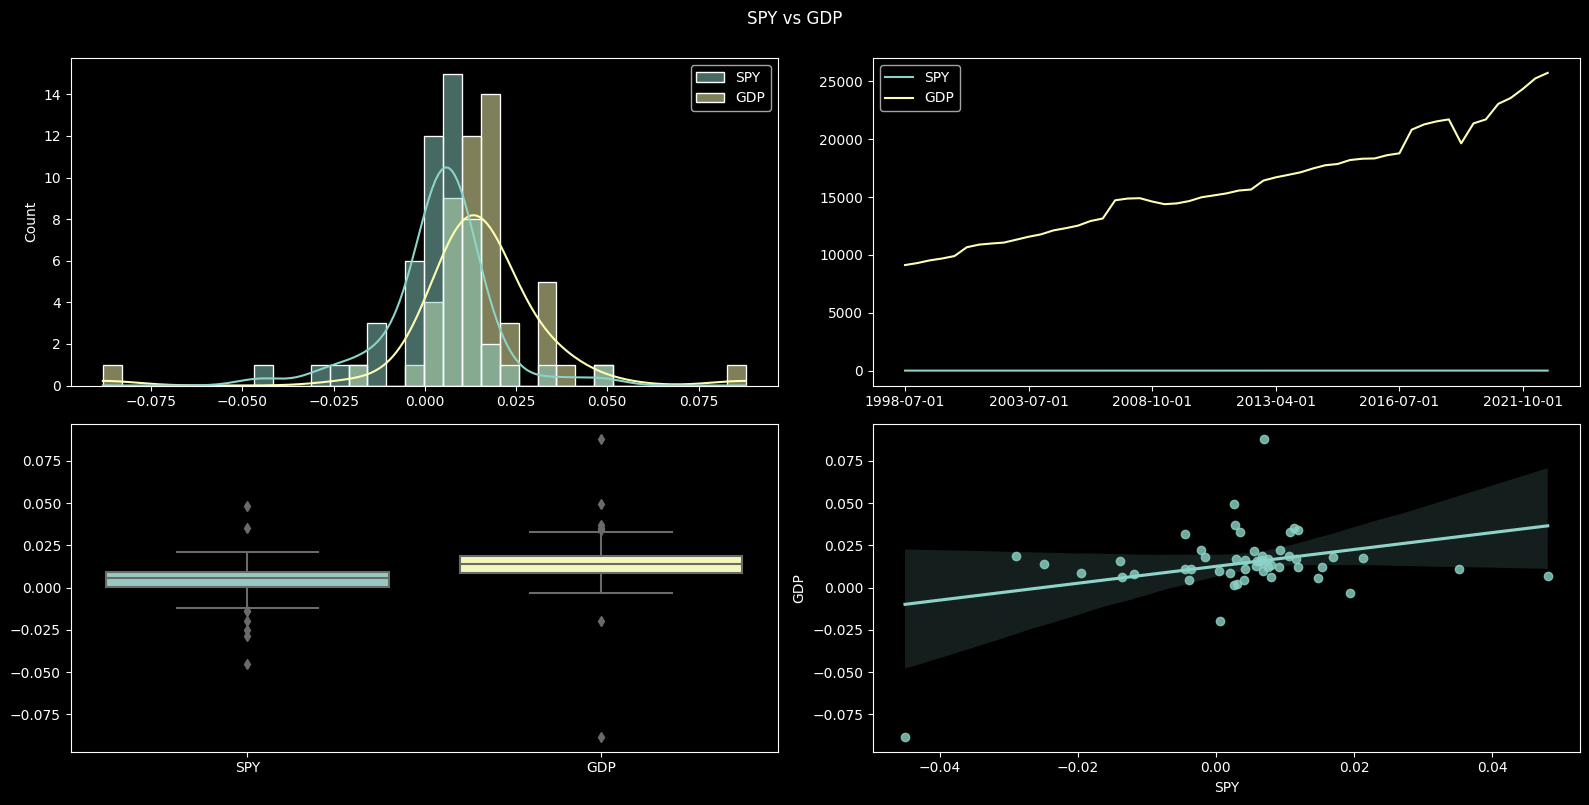

,SPY
SPY,1.0000
DIA,0.9716
^IXIC,0.9339
GDP,0.3425
Real GDP,0.3416


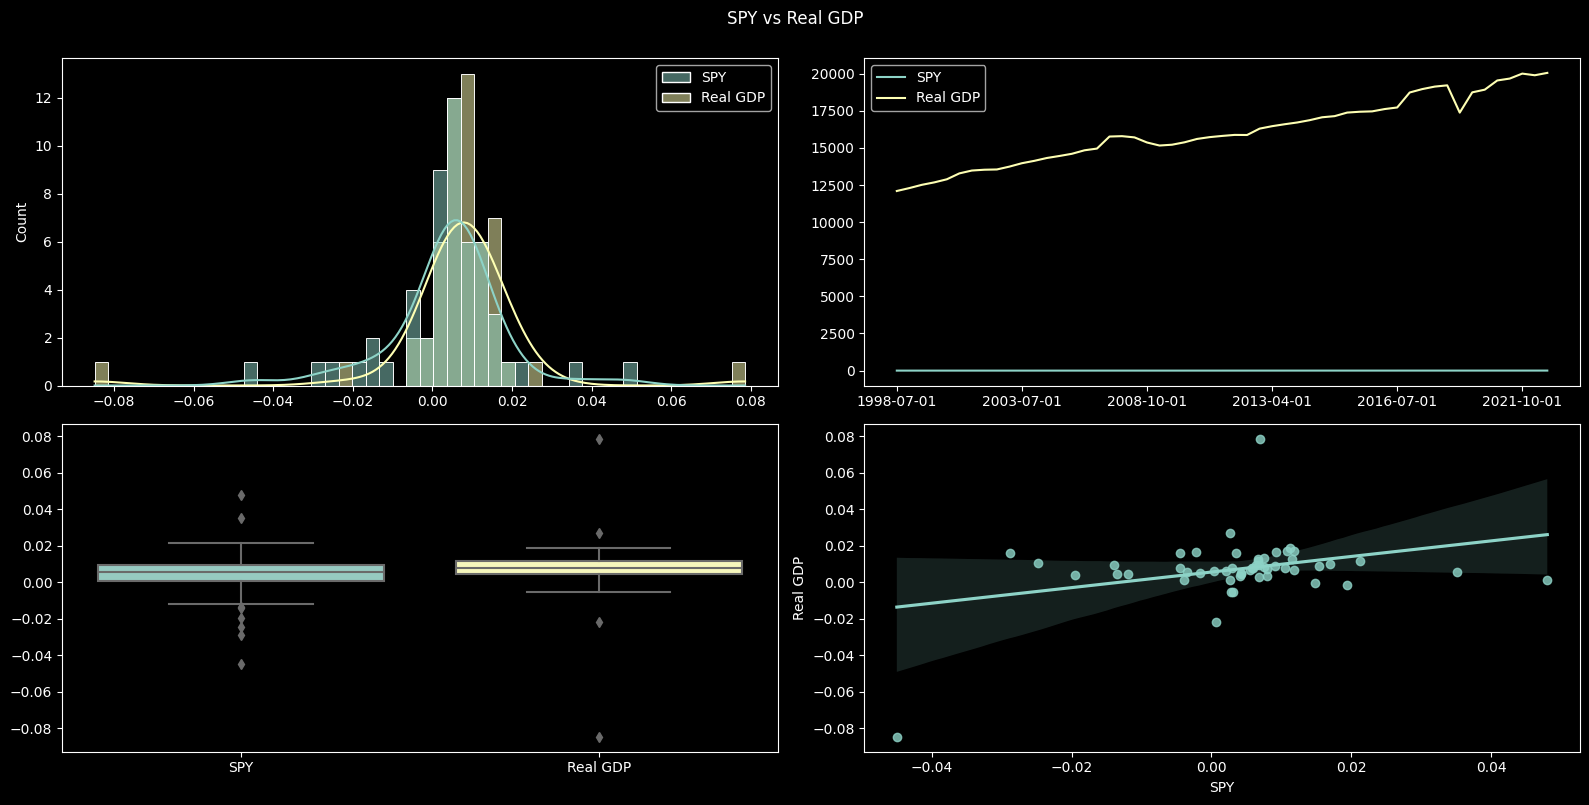

,DIA
SPY,0.9716
DIA,1.0000
^IXIC,0.8602
GDP,0.2952
Real GDP,0.2820


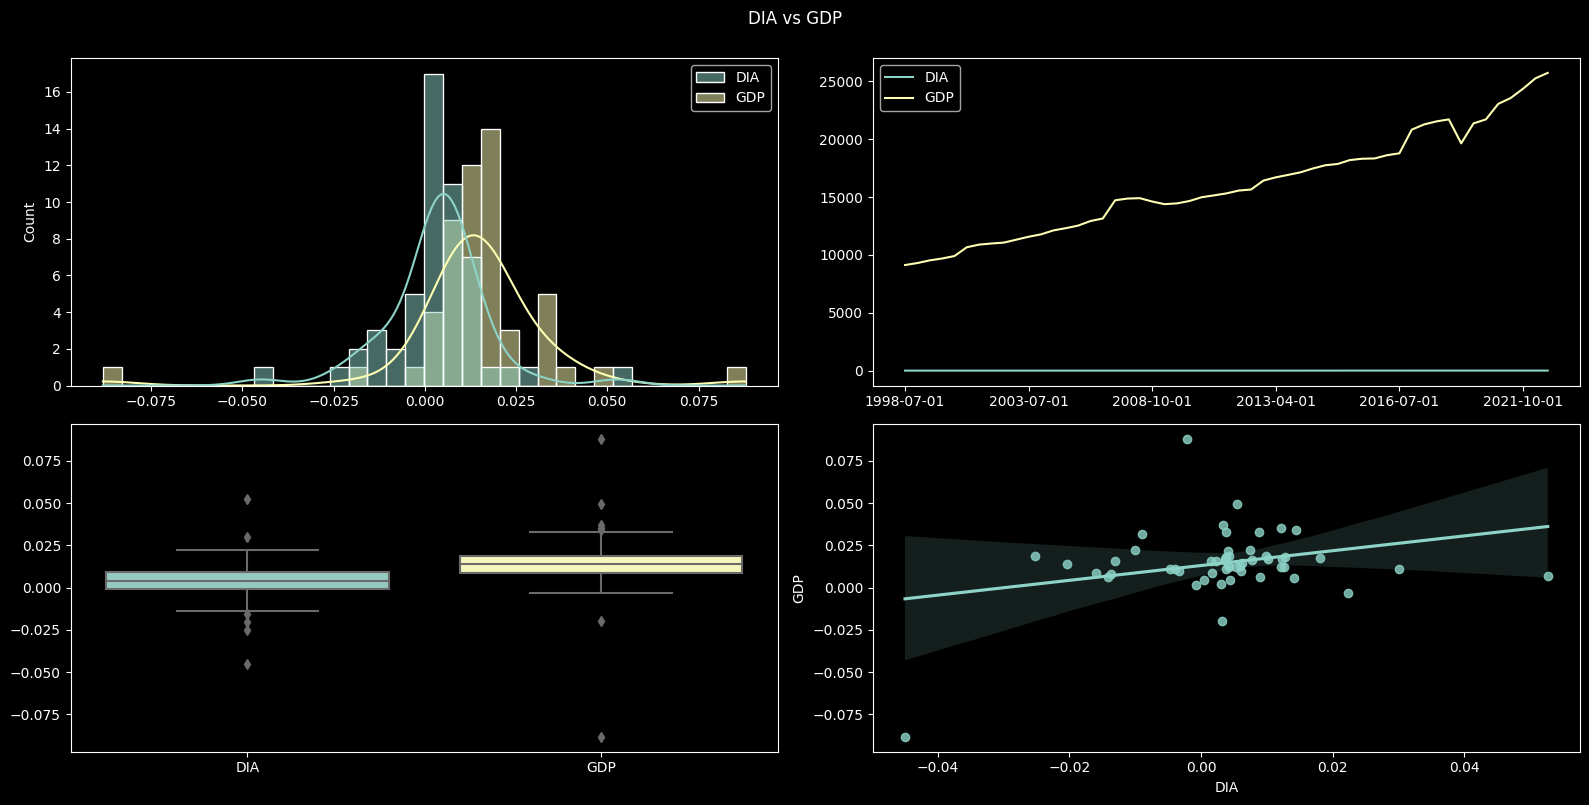

,DIA
SPY,0.9716
DIA,1.0000
^IXIC,0.8602
GDP,0.2952
Real GDP,0.2820


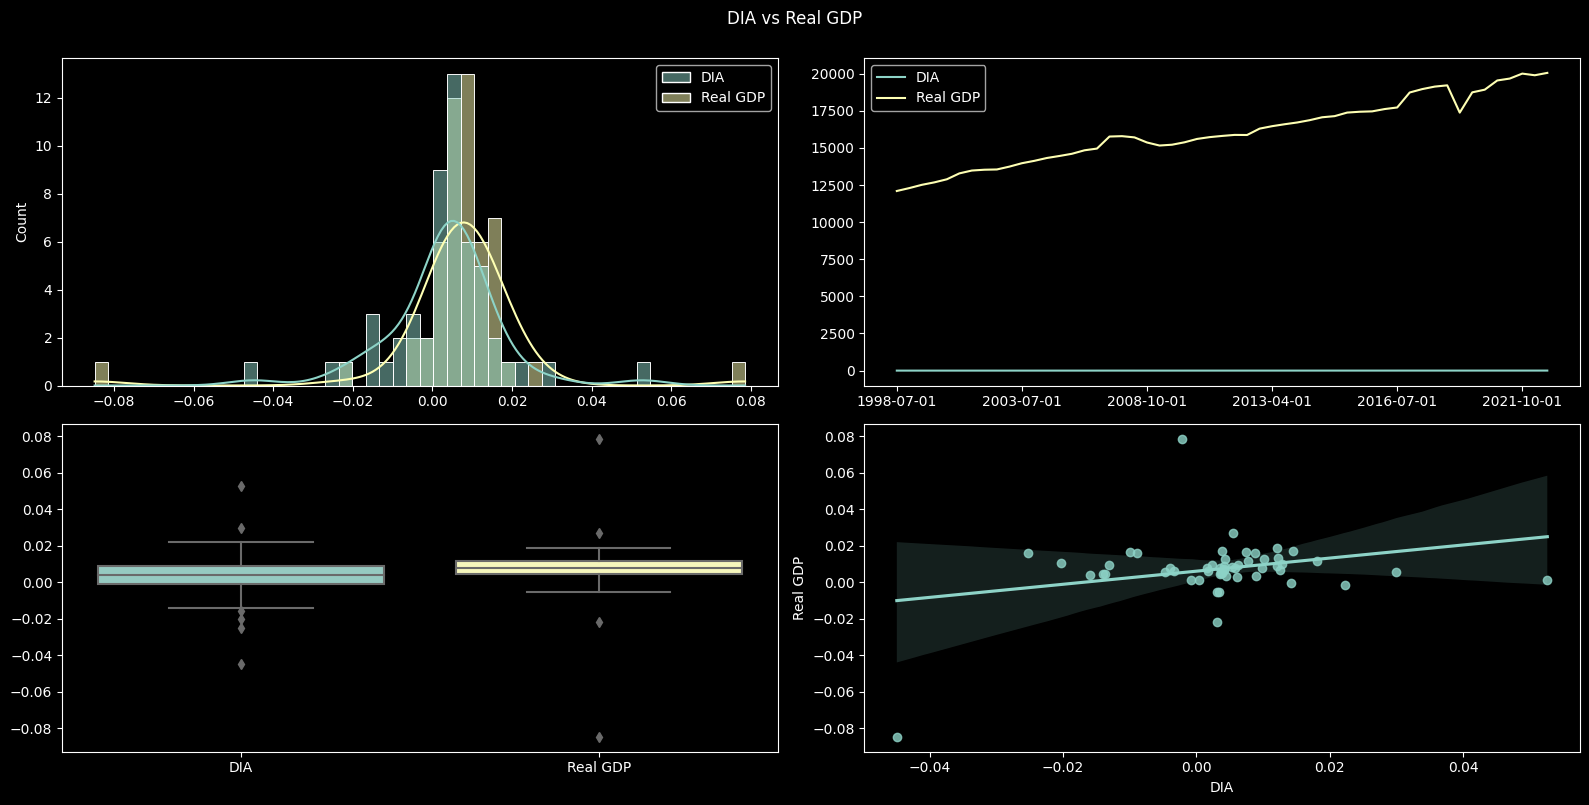

,^IXIC
SPY,0.9339
DIA,0.8602
^IXIC,1.0000
GDP,0.3210
Real GDP,0.3207


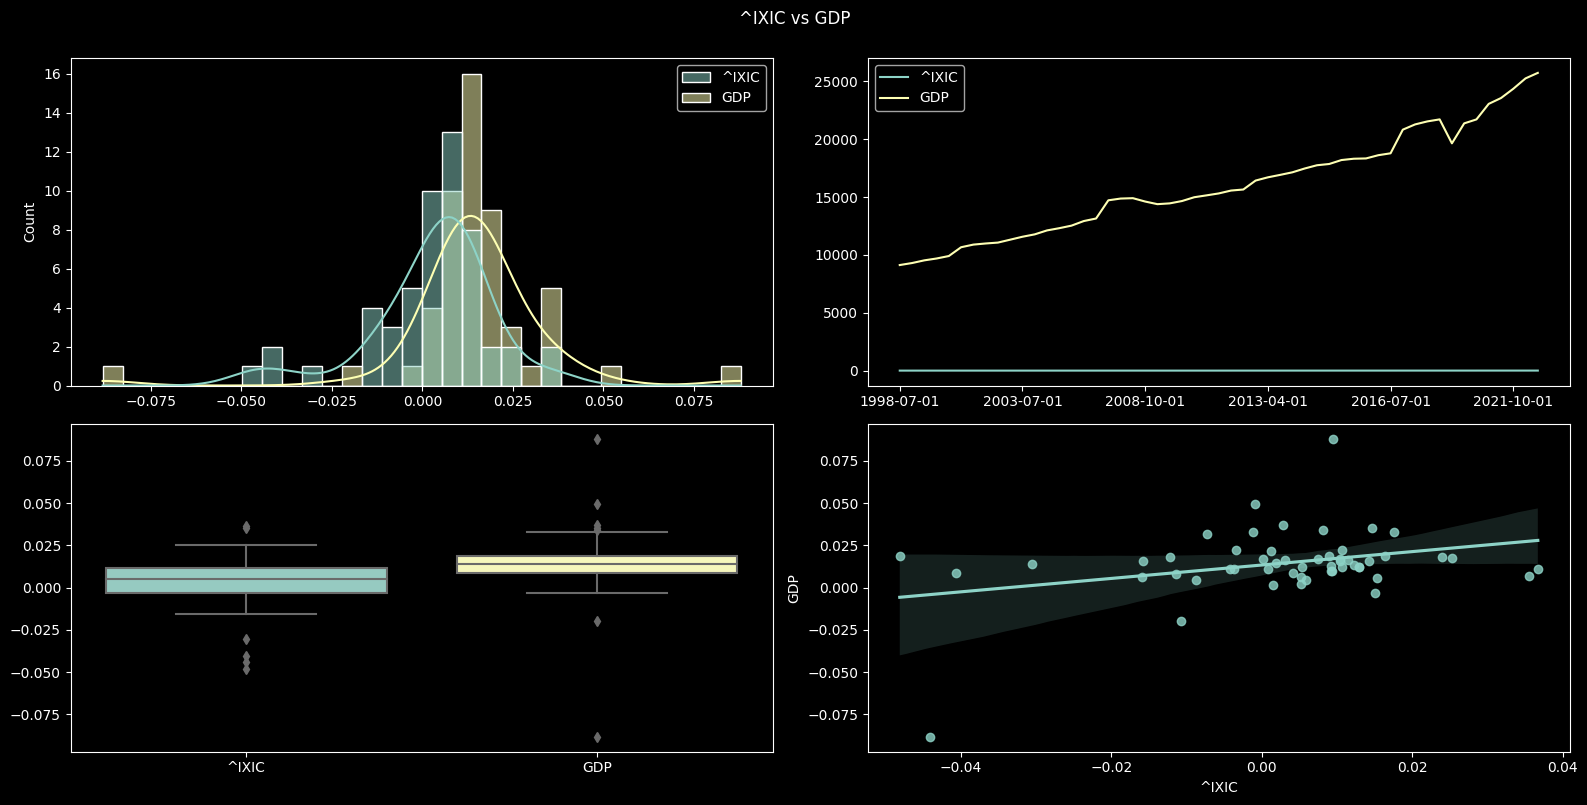

,^IXIC
SPY,0.9339
DIA,0.8602
^IXIC,1.0000
GDP,0.3210
Real GDP,0.3207


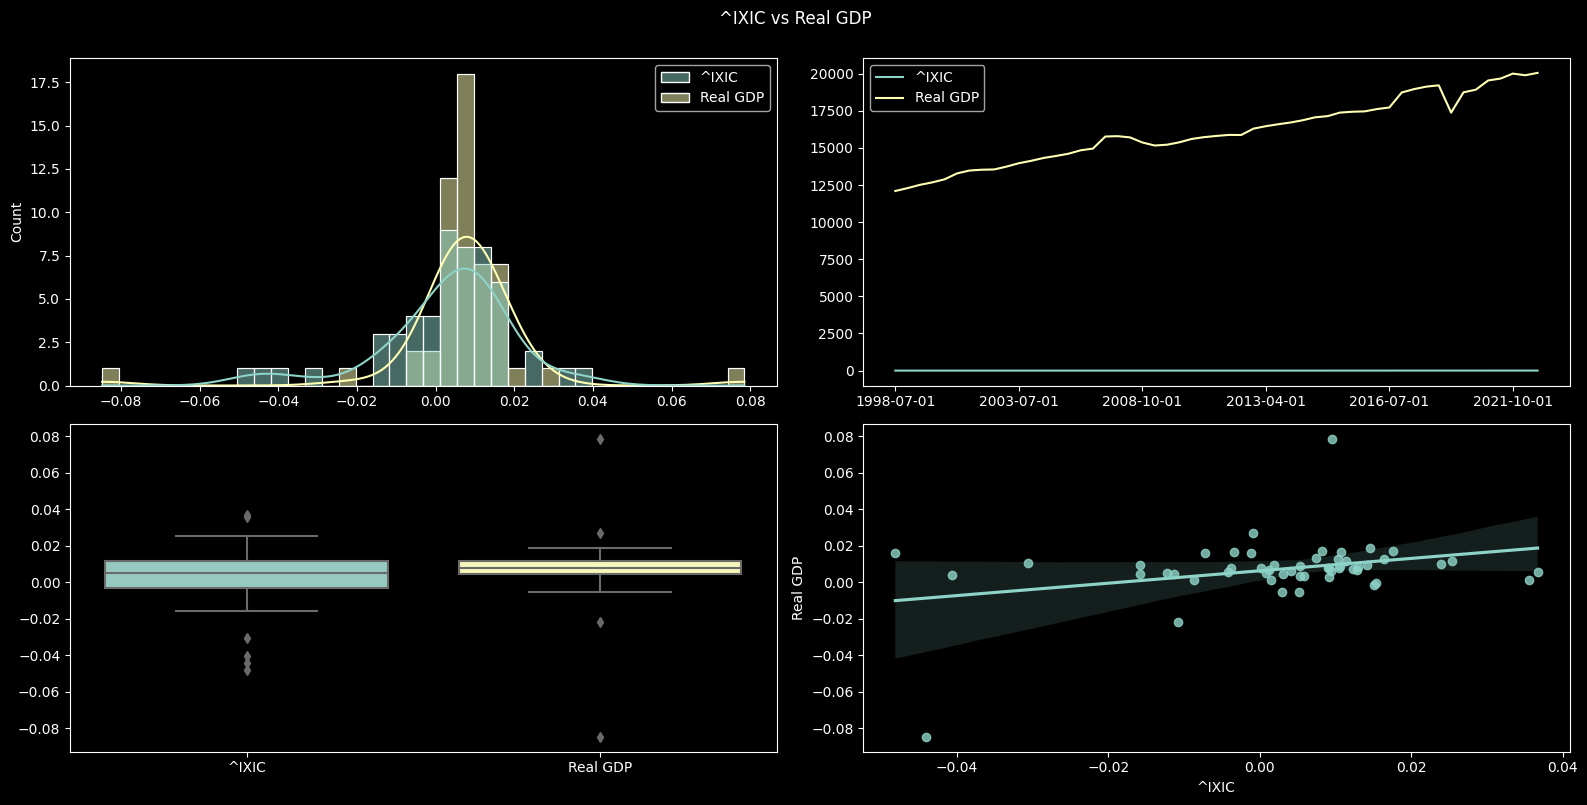

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
analisis = analisis_bivariante(markets, indicators_names, stock_start, stock_end, df_market_rets, df_market_cum, df_gdp)

In [ ]:
analisis

(                 SPY       DIA     ^IXIC       GDP  Real GDP
 1998-07-01  0.011583  0.010104  0.010408  0.016879  0.012528
 1998-10-01 -0.028870 -0.025180 -0.048121  0.018955  0.016162
 1999-04-01  0.007546  0.005274  0.012989  0.012169  0.008350
 1999-07-01  0.007527  0.012285  0.007468  0.016839  0.013230
 1999-10-01 -0.002184 -0.009951 -0.003390  0.022045  0.016428
 2001-10-01 -0.001628  0.003736 -0.012237  0.018169  0.004965
 2002-04-01  0.000436 -0.003375  0.009359  0.009641  0.006155
 2002-07-01 -0.019503 -0.015887 -0.040602  0.008871  0.004035
 2002-10-01  0.048049  0.052631  0.035544  0.007046  0.001307
 2003-04-01  0.015341  0.012152  0.005316  0.012407  0.008934
 2003-07-01  0.009219  0.007453  0.010679  0.022444  0.016669
 2003-10-01  0.021311  0.018039  0.025356  0.017772  0.011540
 2004-04-01  0.006012  0.001539  0.010425  0.015882  0.007787
 2004-07-01 -0.013883 -0.013094 -0.015744  0.015892  0.009412
 2004-10-01  0.016911  0.012789  0.023913  0.018033  0.010220
 2005-04

In [48]:
pd.DataFrame(df_ind_mkt.corr()[[market]].loc[indicator])

,10yTrea30yFRM
SPY,-0.051033


0.01065742093953234


<AxesSubplot:>

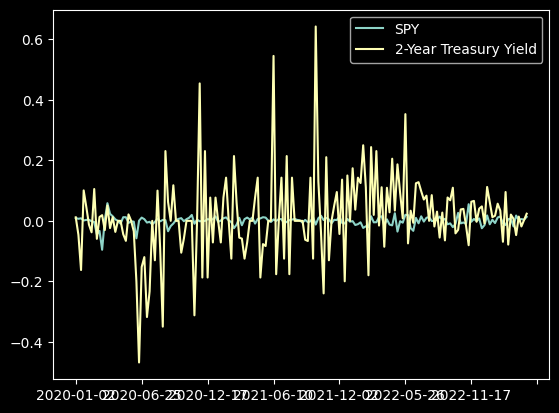

In [ ]:
print(df_ind_mkt[["SPY","2-Year Treasury Yield"]].loc[:].corr().iloc[0,1])
df_ind_mkt[["SPY","2-Year Treasury Yield"]].loc["2020":].plot()

<AxesSubplot:>

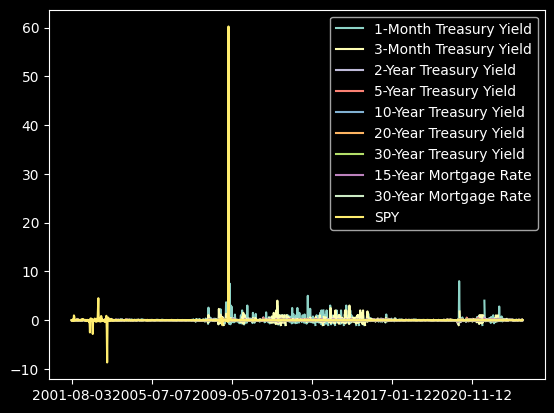

In [ ]:
df = df_market_cum.loc["2001":,"SPY"]
df.index = pd.to_datetime(df.index, utc=True)
df.index = df.index.strftime('%Y-%m-%d')
# df.plot()
df1 = pd.merge(df_interest_rates.loc["2001":].pct_change().shift(0),df.pct_change(), left_index=True, right_index=True)
df1.plot()

In [ ]:
df1.corr()[["SPY"]]

,SPY
1-Month Treasury Yield,-0.003498
3-Month Treasury Yield,0.006085
2-Year Treasury Yield,0.046673
5-Year Treasury Yield,0.028049
10-Year Treasury Yield,0.018943
20-Year Treasury Yield,0.018016
30-Year Treasury Yield,0.031330
15-Year Mortgage Rate,-0.015536
30-Year Mortgage Rate,-0.026445
SPY,1.000000


In [ ]:
df_interest_rates.loc["2019":,'2-Year Treasury Yield']

2019-01-03    2.39
2019-01-10    2.56
2019-01-17    2.56
2019-01-24    2.56
2019-01-31    2.45
              ... 
2023-03-16    4.14
2023-03-23    3.76
2023-03-30    4.10
2023-04-06    3.82
2023-04-13    3.96
Name: 2-Year Treasury Yield, Length: 224, dtype: float64

In [ ]:
df_irate_spy.corr()

In [ ]:
df_ir_s = pd.merge(df_market_cum[["SPY","DIA"]], df_interest_rates.loc[:,'2-Year Treasury Yield':'30-Year Treasury Yield'], left_index=True, right_index=True)

In [ ]:
df_ir_s.loc['2018':,:].corr()

In [ ]:
df_ir_s.index = pd.to_datetime(df_ir_s.index)
df_ir_s_yr = df_ir_s.resample('M').ffill().add_suffix("_monthly")

In [ ]:
df_ir_s_yr.loc['2019':,:].corr()

In [ ]:
df = pd.merge(df_market_cum[["SPY","DIA"]], df_interest_rate_yld, left_index=True, right_index=True)
df.index = pd.to_datetime(df.index)
df= df.resample('A').ffill()


In [ ]:
df.corr()

In [ ]:
min = df.corr().min().min()
max = df.corr().max().max()
center = (max+min)/2

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=min, vmax=max, center=center,
            cmap=sns.color_palette("RdYlGn", as_cmap=True),
            square=True, linewidths=.5, annot=True, fmt='.3f',alpha=1);

In [ ]:
df = pd.merge(df_market_rets[["SPY","DIA"]], df_gdp[["GDP","Real GDP"]], left_index=True, right_index=True)
df["gdp_growth"] = df["GDP"].pct_change().fillna(0)
df["rgdp_growth"] = df["Real GDP"].pct_change().fillna(0)
df = df[["SPY","DIA","gdp_growth","rgdp_growth"]]
df.corr()

In [ ]:
df_inf = df_inflation[["Inflation rate", "PPI rate"]]

In [ ]:
df = pd.merge(df_market_rets[["SPY","DIA"]], df_inf, left_index=True, right_index=True)

In [ ]:
min = df.corr().min().min()
max = df.corr().max().max()
center = (max+min)/2

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=min, vmax=max, center=center,
            cmap=sns.color_palette("RdYlGn", as_cmap=True),
            square=True, linewidths=.5, annot=True, fmt='.3f',alpha=1);

In [ ]:

min = df_market_rets.corr().min().min()
max = df_market_rets.corr().max().max()
center = (max+min)/2

plt.figure(figsize=(10,10))
sns.heatmap(df_market_rets.corr(),vmin=min, vmax=max, center=center,
            cmap=sns.color_palette("RdYlGn", as_cmap=True),
            square=True, linewidths=.5, annot=True, fmt='.3f',alpha=1);